In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert to NumPy arrays
X_train = pd.read_csv(r"Task_2\x_train.csv")  # features
y_train = pd.read_csv(r"Task_2\y_train.csv")  # labels

X_test = pd.read_csv(r"Task_2\x_test.csv")
y_test = pd.read_csv(r"Task_2\y_test.csv")

# Helper functions
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    res = y_pred[np.arange(n_samples), y_true]
    return -np.sum(np.log(res)) / n_samples

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    z1 = relu(np.dot(X, W1) + b1)
    z2 = relu(np.dot(z1, W2) + b2)
    output = softmax(np.dot(z2, W3) + b3)
    return z1, z2, output

def back_propagation(X, y, W1, b1, W2, b2, W3, b3, z1, z2, output):
    n_samples = X.shape[0]
    y_one_hot = np.zeros((n_samples, 4))
    y_one_hot[np.arange(n_samples), y] = 1

    d_output = output - y_one_hot
    d_W3 = np.dot(z2.T, d_output) / n_samples
    d_b3 = np.sum(d_output, axis=0) / n_samples

    d_z2 = np.dot(d_output, W3.T)
    d_z2[z2 <= 0] = 0
    d_W2 = np.dot(z1.T, d_z2) / n_samples
    d_b2 = np.sum(d_z2, axis=0) / n_samples

    d_z1 = np.dot(d_z2, W2.T)
    d_z1[z1 <= 0] = 0
    d_W1 = np.dot(X.T, d_z1) / n_samples
    d_b1 = np.sum(d_z1, axis=0) / n_samples

    return d_W1, d_b1, d_W2, d_b2, d_W3, d_b3

# Training the neural network
def train_neural_network(X_train, y_train, X_test, y_test, learning_rate, iterations):
    n_features = X_train.shape[1]
    n_hidden1 = 100
    n_hidden2 = 40
    n_output = 4

    # Initialize weights and biases
    W1 = np.random.randn(n_features, n_hidden1) * 0.01
    b1 = np.zeros((1, n_hidden1))
    W2 = np.random.randn(n_hidden1, n_hidden2) * 0.01
    b2 = np.zeros((1, n_hidden2))
    W3 = np.random.randn(n_hidden2, n_output) * 0.01
    b3 = np.zeros((1, n_output))

    train_costs, test_costs, train_accuracies, test_accuracies = [], [], [], []

    for i in range(iterations):
        # Forward propagation
        z1, z2, output = forward_propagation(X_train, W1, b1, W2, b2, W3, b3)

        # Compute training cost and accuracy
        train_loss = cross_entropy_loss(y_train, output)
        y_train_pred = np.argmax(output, axis=1)
        train_acc = accuracy(y_train, y_train_pred)

        # Backpropagation
        d_W1, d_b1, d_W2, d_b2, d_W3, d_b3 = back_propagation(X_train, y_train, W1, b1, W2, b2, W3, b3, z1, z2, output)

        # Gradient descent update
        W1 -= learning_rate * d_W1
        b1 -= learning_rate * d_b1
        W2 -= learning_rate * d_W2
        b2 -= learning_rate * d_b2
        W3 -= learning_rate * d_W3
        b3 -= learning_rate * d_b3

        # Test the network on testing data
        _, _, test_output = forward_propagation(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = cross_entropy_loss(y_test, test_output)
        y_test_pred = np.argmax(test_output, axis=1)
        test_acc = accuracy(y_test, y_test_pred)

        # Store metrics for plotting
        train_costs.append(train_loss)
        test_costs.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss}, Test Loss: {test_loss}, Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")

    return train_costs, test_costs, train_accuracies, test_accuracies

# Plotting function
def plot_metrics(train_costs, test_costs, train_accs, test_accs, learning_rate):
    iterations = range(len(train_costs))

    # Plot the training and testing costs
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(iterations, train_costs, label='Train Cost')
    plt.plot(iterations, test_costs, label='Test Cost')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost vs. Iterations (Learning Rate: {learning_rate})')
    plt.legend()

    # Plot the training and testing accuracies
    plt.subplot(1, 2, 2)
    plt.plot(iterations, train_accs, label='Train Accuracy')
    plt.plot(iterations, test_accs, label='Test Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs. Iterations (Learning Rate: {learning_rate})')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Train the model with different learning rates
learning_rates = [1, 0.1, 0.001]
iterations = 1000

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    train_costs, test_costs, train_accs, test_accs = train_neural_network(X_train, y_train, X_test, y_test, lr, iterations)
    plot_metrics(train_costs, test_costs, train_accs, test_accs, lr)



Training with learning rate: 1


ValueError: Unable to coerce to Series, length must be 1: given 13106

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert to NumPy arrays
X_train = pd.read_csv(r"Task_2\x_train.csv").values  # features
y_train = pd.read_csv(r"Task_2\y_train.csv").values  # labels

X_test = pd.read_csv(r"Task_2\x_test.csv").values
y_test = pd.read_csv(r"Task_2\y_test.csv").values

# Helper functions
def relu(x):
    return np.maximum(0, x)

# Softmax function with numerical stability
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # subtract max to avoid large exponents
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Cross-entropy loss with numerical stability (prevent log(0))
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    y_pred = np.clip(y_pred, 1e-10, 1.0)  # Clip to prevent log(0)
    res = y_pred[np.arange(n_samples), y_true]
    return -np.sum(np.log(res)) / n_samples

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    z1 = relu(np.dot(X, W1) + b1)
    z2 = relu(np.dot(z1, W2) + b2)
    output = softmax(np.dot(z2, W3) + b3)
    return z1, z2, output

def back_propagation(X, y, W1, b1, W2, b2, W3, b3, z1, z2, output):
    n_samples = X.shape[0]
    y_one_hot = np.zeros((n_samples, 4))
    y_one_hot[np.arange(n_samples), y] = 1

    d_output = output - y_one_hot
    d_W3 = np.dot(z2.T, d_output) / n_samples
    d_b3 = np.sum(d_output, axis=0) / n_samples

    d_z2 = np.dot(d_output, W3.T)
    d_z2[z2 <= 0] = 0
    d_W2 = np.dot(z1.T, d_z2) / n_samples
    d_b2 = np.sum(d_z2, axis=0) / n_samples

    d_z1 = np.dot(d_z2, W2.T)
    d_z1[z1 <= 0] = 0
    d_W1 = np.dot(X.T, d_z1) / n_samples
    d_b1 = np.sum(d_z1, axis=0) / n_samples

    return d_W1, d_b1, d_W2, d_b2, d_W3, d_b3

# Training the neural network
def train_neural_network(X_train, y_train, X_test, y_test, learning_rate, iterations):
    n_features = X_train.shape[1]
    n_hidden1 = 100
    n_hidden2 = 40
    n_output = 4

    # Initialize weights and biases
    W1 = np.random.randn(n_features, n_hidden1) * 0.01
    b1 = np.zeros((1, n_hidden1))
    W2 = np.random.randn(n_hidden1, n_hidden2) * 0.01
    b2 = np.zeros((1, n_hidden2))
    W3 = np.random.randn(n_hidden2, n_output) * 0.01
    b3 = np.zeros((1, n_output))

    train_costs, test_costs, train_accuracies, test_accuracies = [], [], [], []

    for i in range(iterations):
        # Forward propagation
        z1, z2, output = forward_propagation(X_train, W1, b1, W2, b2, W3, b3)

        # Compute training cost and accuracy
        train_loss = cross_entropy_loss(y_train, output)
        y_train_pred = np.argmax(output, axis=1)
        train_acc = accuracy(y_train, y_train_pred)

        # Backpropagation
        d_W1, d_b1, d_W2, d_b2, d_W3, d_b3 = back_propagation(X_train, y_train, W1, b1, W2, b2, W3, b3, z1, z2, output)

        # Gradient descent update
        W1 -= learning_rate * d_W1
        b1 -= learning_rate * d_b1
        W2 -= learning_rate * d_W2
        b2 -= learning_rate * d_b2
        W3 -= learning_rate * d_W3
        b3 -= learning_rate * d_b3

        # Test the network on testing data
        _, _, test_output = forward_propagation(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = cross_entropy_loss(y_test, test_output)
        y_test_pred = np.argmax(test_output, axis=1)
        test_acc = accuracy(y_test, y_test_pred)

        # Store metrics for plotting
        train_costs.append(train_loss)
        test_costs.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        # if i % 100 == 0:
        print(f"Iteration {i}: Train Loss: {train_loss}, Test Loss: {test_loss}, Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")

    return train_costs, test_costs, train_accuracies, test_accuracies

# Plotting function
def plot_metrics(train_costs, test_costs, train_accs, test_accs, learning_rate):
    iterations = range(len(train_costs))

    # Plot the training and testing costs
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(iterations, train_costs, label='Train Cost')
    plt.plot(iterations, test_costs, label='Test Cost')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost vs. Iterations (Learning Rate: {learning_rate})')
    plt.legend()

    # Plot the training and testing accuracies
    plt.subplot(1, 2, 2)
    plt.plot(iterations, train_accs, label='Train Accuracy')
    plt.plot(iterations, test_accs, label='Test Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs. Iterations (Learning Rate: {learning_rate})')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Train the model with different learning rates
learning_rates = [1, 0.1, 0.001]
iterations = 1000

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    train_costs, test_costs, train_accs, test_accs = train_neural_network(X_train, y_train, X_test, y_test, lr, iterations)
    plot_metrics(train_costs, test_costs, train_accs, test_accs, lr)



Training with learning rate: 1
Iteration 0: Train Loss: 18168.77678943168, Test Loss: 4541.389281704058, Train Accuracy: 0.26390924751213907, Test Accuracy: 0.28876678876678874
Iteration 1: Train Loss: 18168.39921085468, Test Loss: 4541.178771249535, Train Accuracy: 0.2844432916181989, Test Accuracy: 0.28876678876678874
Iteration 2: Train Loss: 18167.694478173937, Test Loss: 4540.754381401831, Train Accuracy: 0.2844498702884175, Test Accuracy: 0.28876678876678874
Iteration 3: Train Loss: 18166.2627841597, Test Loss: 4539.693056264762, Train Accuracy: 0.2844498702884175, Test Accuracy: 0.28876678876678874
Iteration 4: Train Loss: 18162.710459056823, Test Loss: 4537.584431547384, Train Accuracy: 0.2844498702884175, Test Accuracy: 0.28876678876678874
Iteration 5: Train Loss: 18155.723211693636, Test Loss: 4539.135748093166, Train Accuracy: 0.2844498702884175, Test Accuracy: 0.28876678876678874
Iteration 6: Train Loss: 18160.944025641642, Test Loss: 4794.350885596713, Train Accuracy: 0.28

c:\Users\sajee\miniconda3\envs\dnn-assignment\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract


Iteration 13: Train Loss: 228830.9065417745, Test Loss: nan, Train Accuracy: 0.2417213490004578, Test Accuracy: 0.20238095238095238
Iteration 14: Train Loss: nan, Test Loss: nan, Train Accuracy: 0.19800091561117045, Test Accuracy: 0.20238095238095238
Iteration 15: Train Loss: nan, Test Loss: nan, Train Accuracy: 0.19800091561117045, Test Accuracy: 0.20238095238095238
Iteration 16: Train Loss: nan, Test Loss: nan, Train Accuracy: 0.19800091561117045, Test Accuracy: 0.20238095238095238
Iteration 17: Train Loss: nan, Test Loss: nan, Train Accuracy: 0.19800091561117045, Test Accuracy: 0.20238095238095238
Iteration 18: Train Loss: nan, Test Loss: nan, Train Accuracy: 0.19800091561117045, Test Accuracy: 0.20238095238095238
Iteration 19: Train Loss: nan, Test Loss: nan, Train Accuracy: 0.19800091561117045, Test Accuracy: 0.20238095238095238
Iteration 20: Train Loss: nan, Test Loss: nan, Train Accuracy: 0.19800091561117045, Test Accuracy: 0.20238095238095238
Iteration 21: Train Loss: nan, Test

KeyboardInterrupt: 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

# Softmax function with numerical stability
def softmax(x):
    shift_x = x - np.max(x, axis=1, keepdims=True)  # Subtract max for stability
    exp_x = np.exp(shift_x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Cross-entropy loss function with stability (prevents log(0))
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    y_pred = np.clip(y_pred, 1e-10, 1.0)  # Clip values to avoid log(0)
    correct_confidences = y_pred[range(n_samples), y_true]
    loss = -np.sum(np.log(correct_confidences)) / n_samples
    return loss

# Function to compute accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Backpropagation and weight update
def backprop(X, y, W1, b1, W2, b2, W3, b3, learning_rate):
    # Forward propagation
    z1 = np.dot(X, W1) + b1
    a1 = np.maximum(0, z1)  # ReLU activation

    z2 = np.dot(a1, W2) + b2
    a2 = np.maximum(0, z2)  # ReLU activation

    z3 = np.dot(a2, W3) + b3
    output = softmax(z3)  # Softmax activation

    # Calculate loss
    loss = cross_entropy_loss(y, output)

    # Backward propagation
    m = y.shape[0]
    output[range(m), y] -= 1
    output /= m

    dW3 = np.dot(a2.T, output)
    db3 = np.sum(output, axis=0)

    da2 = np.dot(output, W3.T)
    dz2 = da2 * (z2 > 0)  # ReLU derivative

    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0)

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * (z1 > 0)  # ReLU derivative

    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1, b1, W2, b2, W3, b3, loss

# Train the neural network
def train_neural_network(X_train, y_train, X_test, y_test, learning_rate, iterations):
    input_size = X_train.shape[1]
    hidden_size1 = 100
    hidden_size2 = 40
    output_size = 4  # Number of classes

    # Initialize weights and biases
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size1) * 0.01
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) * 0.01
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size) * 0.01
    b3 = np.zeros((1, output_size))

    train_costs = []
    test_costs = []
    train_accs = []
    test_accs = []

    for i in range(iterations):
        # Backpropagation and weight updates
        W1, b1, W2, b2, W3, b3, train_loss = backprop(X_train, y_train, W1, b1, W2, b2, W3, b3, learning_rate)

        # Forward pass for training accuracy
        z1 = np.dot(X_train, W1) + b1
        a1 = np.maximum(0, z1)  # ReLU activation
        z2 = np.dot(a1, W2) + b2
        a2 = np.maximum(0, z2)  # ReLU activation
        z3 = np.dot(a2, W3) + b3
        train_output = softmax(z3)
        y_train_pred = np.argmax(train_output, axis=1)
        train_acc = accuracy(y_train, y_train_pred)

        # Forward pass for test accuracy
        z1_test = np.dot(X_test, W1) + b1
        a1_test = np.maximum(0, z1_test)  # ReLU activation
        z2_test = np.dot(a1_test, W2) + b2
        a2_test = np.maximum(0, z2_test)  # ReLU activation
        z3_test = np.dot(a2_test, W3) + b3
        test_output = softmax(z3_test)
        y_test_pred = np.argmax(test_output, axis=1)
        test_acc = accuracy(y_test, y_test_pred)

        # Calculate test loss
        test_loss = cross_entropy_loss(y_test, test_output)

        # Store loss and accuracy values
        train_costs.append(train_loss)
        test_costs.append(test_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        # Print progress every 100 iterations
        # if i % 100 == 0:
        print(f"Iteration {i} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

    return train_costs, test_costs, train_accs, test_accs

# Plot training results
def plot_metrics(train_costs, test_costs, train_accs, test_accs, learning_rate):
    iterations = len(train_costs)
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(iterations), train_costs, label='Train Loss')
    plt.plot(range(iterations), test_costs, label='Test Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Loss vs Iterations (Learning Rate = {learning_rate})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(iterations), train_accs, label='Train Accuracy')
    plt.plot(range(iterations), test_accs, label='Test Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Iterations (Learning Rate = {learning_rate})')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# Convert to NumPy arrays
X_train = pd.read_csv(r"Task_2\x_train.csv").values  # features
y_train = pd.read_csv(r"Task_2\y_train.csv").values  # labels

X_test = pd.read_csv(r"Task_2\x_test.csv").values
y_test = pd.read_csv(r"Task_2\y_test.csv").values

learning_rates = [1, 0.1, 0.001]
iterations = 100

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    train_costs, test_costs, train_accs, test_accs = train_neural_network(X_train, y_train, X_test, y_test, lr, iterations)
    plot_metrics(train_costs, test_costs, train_accs, test_accs, lr)



Training with learning rate: 1
Iteration 0 | Train Loss: 18168.7675 | Test Loss: 4541.5545 | Train Acc: 0.2217 | Test Acc: 0.2243
Iteration 1 | Train Loss: 18168.9827 | Test Loss: 4541.6870 | Train Acc: 0.1997 | Test Acc: 0.2035
Iteration 2 | Train Loss: 18169.4787 | Test Loss: 4541.9013 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 3 | Train Loss: 18170.3002 | Test Loss: 4542.5008 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 4 | Train Loss: 18172.6030 | Test Loss: 4543.8878 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 5 | Train Loss: 18177.9031 | Test Loss: 4544.7958 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 6 | Train Loss: 18181.3596 | Test Loss: 4529.0576 | Train Acc: 0.2758 | Test Acc: 0.2778
Iteration 7 | Train Loss: 18126.1916 | Test Loss: 60166.5485 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 8 | Train Loss: 242024.7191 | Test Loss: 58002.1185 | Train Acc: 0.2417 | Test Acc: 0.2311
Iteration 9 | Train Loss: 228830.9065 | Test Loss: 53650.2327 | Train Acc:

c:\Users\sajee\miniconda3\envs\dnn-assignment\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


Iteration 13 | Train Loss: 137787.7587 | Test Loss: nan | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 14 | Train Loss: nan | Test Loss: nan | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 15 | Train Loss: nan | Test Loss: nan | Train Acc: 0.1980 | Test Acc: 0.2024


KeyboardInterrupt: 


Training with learning rate: 1
Iteration 0 | Train Loss: 18168.7675 | Test Loss: 4541.5545 | Train Acc: 0.2217 | Test Acc: 0.2243
Iteration 1 | Train Loss: 18168.9827 | Test Loss: 4541.6870 | Train Acc: 0.1997 | Test Acc: 0.2035
Iteration 2 | Train Loss: 18169.4787 | Test Loss: 4541.9013 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 3 | Train Loss: 18170.3002 | Test Loss: 4542.5008 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 4 | Train Loss: 18172.6030 | Test Loss: 4543.8878 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 5 | Train Loss: 18177.9031 | Test Loss: 4544.7958 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 6 | Train Loss: 18181.3596 | Test Loss: 4529.0576 | Train Acc: 0.2758 | Test Acc: 0.2778
Iteration 7 | Train Loss: 18126.1916 | Test Loss: 60166.5485 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 8 | Train Loss: 242024.7191 | Test Loss: 58002.1185 | Train Acc: 0.2417 | Test Acc: 0.2311
Iteration 9 | Train Loss: 228830.9065 | Test Loss: 53650.2327 | Train Acc:

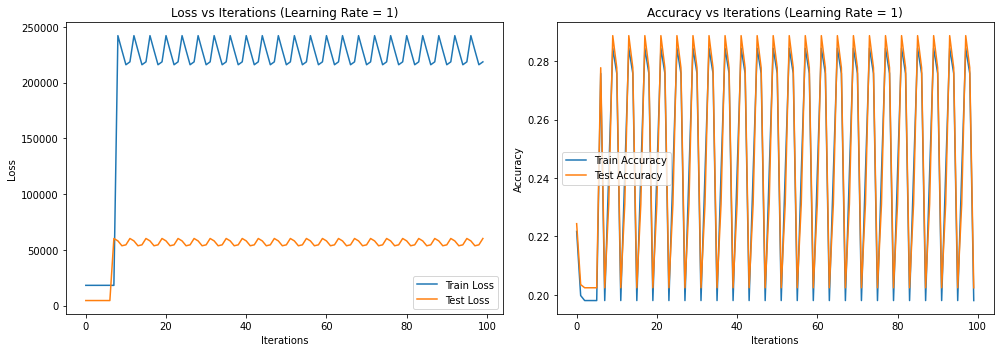


Training with learning rate: 0.1
Iteration 0 | Train Loss: 18168.7675 | Test Loss: 4541.5039 | Train Acc: 0.2561 | Test Acc: 0.2535
Iteration 1 | Train Loss: 18168.7793 | Test Loss: 4541.5107 | Train Acc: 0.2533 | Test Acc: 0.2510
Iteration 2 | Train Loss: 18168.8062 | Test Loss: 4541.5211 | Train Acc: 0.2478 | Test Acc: 0.2466
Iteration 3 | Train Loss: 18168.8470 | Test Loss: 4541.5338 | Train Acc: 0.2380 | Test Acc: 0.2375
Iteration 4 | Train Loss: 18168.8967 | Test Loss: 4541.5481 | Train Acc: 0.2269 | Test Acc: 0.2268
Iteration 5 | Train Loss: 18168.9518 | Test Loss: 4541.5631 | Train Acc: 0.2184 | Test Acc: 0.2181
Iteration 6 | Train Loss: 18169.0092 | Test Loss: 4541.5787 | Train Acc: 0.2120 | Test Acc: 0.2125
Iteration 7 | Train Loss: 18169.0691 | Test Loss: 4541.5954 | Train Acc: 0.2072 | Test Acc: 0.2088
Iteration 8 | Train Loss: 18169.1329 | Test Loss: 4541.6135 | Train Acc: 0.2039 | Test Acc: 0.2064
Iteration 9 | Train Loss: 18169.2021 | Test Loss: 4541.6333 | Train Acc: 0.

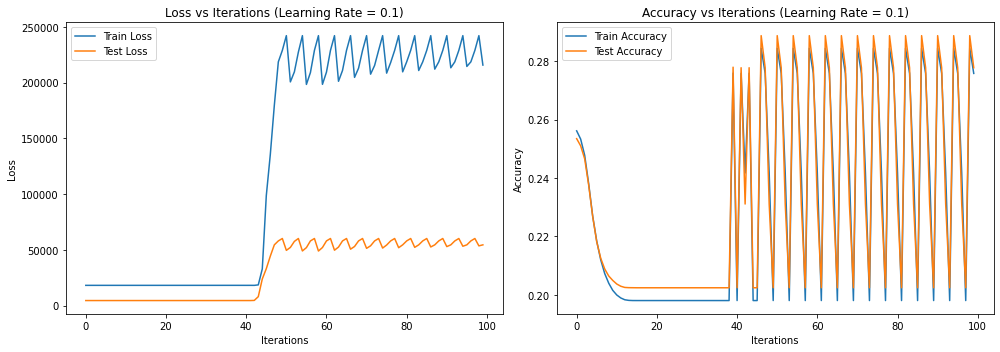


Training with learning rate: 0.001
Iteration 0 | Train Loss: 18168.7675 | Test Loss: 4541.5006 | Train Acc: 0.2574 | Test Acc: 0.2551
Iteration 1 | Train Loss: 18168.7676 | Test Loss: 4541.5006 | Train Acc: 0.2573 | Test Acc: 0.2551
Iteration 2 | Train Loss: 18168.7677 | Test Loss: 4541.5006 | Train Acc: 0.2573 | Test Acc: 0.2551
Iteration 3 | Train Loss: 18168.7678 | Test Loss: 4541.5007 | Train Acc: 0.2573 | Test Acc: 0.2551
Iteration 4 | Train Loss: 18168.7678 | Test Loss: 4541.5007 | Train Acc: 0.2573 | Test Acc: 0.2551
Iteration 5 | Train Loss: 18168.7679 | Test Loss: 4541.5007 | Train Acc: 0.2573 | Test Acc: 0.2552
Iteration 6 | Train Loss: 18168.7680 | Test Loss: 4541.5007 | Train Acc: 0.2573 | Test Acc: 0.2552
Iteration 7 | Train Loss: 18168.7681 | Test Loss: 4541.5008 | Train Acc: 0.2573 | Test Acc: 0.2552
Iteration 8 | Train Loss: 18168.7682 | Test Loss: 4541.5008 | Train Acc: 0.2573 | Test Acc: 0.2552
Iteration 9 | Train Loss: 18168.7683 | Test Loss: 4541.5008 | Train Acc: 

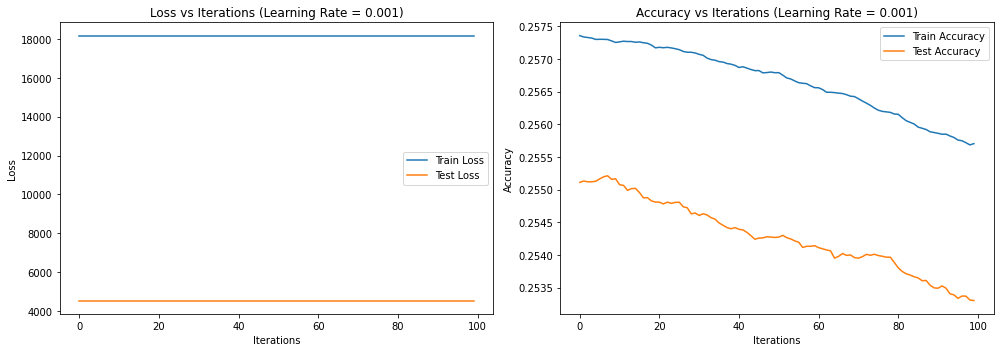

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU activation function
def relu_derivative(x):
    return (x > 0).astype(float)

# Softmax function with numerical stability
def softmax(x):
    shift_x = x - np.max(x, axis=1, keepdims=True)  # Subtract max for stability
    exp_x = np.exp(shift_x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Cross-entropy loss function with stability (prevents log(0))
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    y_pred = np.clip(y_pred, 1e-10, 1.0)  # Clip values to avoid log(0)
    correct_confidences = y_pred[range(n_samples), y_true]
    loss = -np.sum(np.log(correct_confidences)) / n_samples
    return loss

# Function to compute accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Backpropagation and weight update with gradient clipping
def backprop(X, y, W1, b1, W2, b2, W3, b3, learning_rate, clip_value=5.0):
    # Forward propagation
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)  # ReLU activation

    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)  # ReLU activation

    z3 = np.dot(a2, W3) + b3
    output = softmax(z3)  # Softmax activation

    # Calculate loss
    loss = cross_entropy_loss(y, output)

    # Backward propagation
    m = y.shape[0]
    output[range(m), y] -= 1
    output /= m

    dW3 = np.dot(a2.T, output)
    db3 = np.sum(output, axis=0)

    da2 = np.dot(output, W3.T)
    dz2 = da2 * relu_derivative(z2)  # ReLU derivative

    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0)

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)  # ReLU derivative

    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0)

    # Gradient clipping to avoid exploding gradients
    dW1 = np.clip(dW1, -clip_value, clip_value)
    dW2 = np.clip(dW2, -clip_value, clip_value)
    dW3 = np.clip(dW3, -clip_value, clip_value)
    db1 = np.clip(db1, -clip_value, clip_value)
    db2 = np.clip(db2, -clip_value, clip_value)
    db3 = np.clip(db3, -clip_value, clip_value)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1, b1, W2, b2, W3, b3, loss

# Train the neural network
def train_neural_network(X_train, y_train, X_test, y_test, learning_rate, iterations):
    input_size = X_train.shape[1]
    hidden_size1 = 100
    hidden_size2 = 40
    output_size = 4  # Number of classes

    # Initialize weights and biases
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size1) * 0.01
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) * 0.01
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size) * 0.01
    b3 = np.zeros((1, output_size))

    train_costs = []
    test_costs = []
    train_accs = []
    test_accs = []

    for i in range(iterations):
        # Backpropagation and weight updates
        W1, b1, W2, b2, W3, b3, train_loss = backprop(X_train, y_train, W1, b1, W2, b2, W3, b3, learning_rate)

        # Forward pass for training accuracy
        z1 = np.dot(X_train, W1) + b1
        a1 = relu(z1)  # ReLU activation
        z2 = np.dot(a1, W2) + b2
        a2 = relu(z2)  # ReLU activation
        z3 = np.dot(a2, W3) + b3
        train_output = softmax(z3)
        y_train_pred = np.argmax(train_output, axis=1)
        train_acc = accuracy(y_train, y_train_pred)

        # Forward pass for test accuracy
        z1_test = np.dot(X_test, W1) + b1
        a1_test = relu(z1_test)  # ReLU activation
        z2_test = np.dot(a1_test, W2) + b2
        a2_test = relu(z2_test)  # ReLU activation
        z3_test = np.dot(a2_test, W3) + b3
        test_output = softmax(z3_test)
        y_test_pred = np.argmax(test_output, axis=1)
        test_acc = accuracy(y_test, y_test_pred)

        # Calculate test loss
        test_loss = cross_entropy_loss(y_test, test_output)

        # Store loss and accuracy values
        train_costs.append(train_loss)
        test_costs.append(test_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        # Print progress every 100 iterations
        # if i % 100 == 0:
        print(f"Iteration {i} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

    return train_costs, test_costs, train_accs, test_accs

# Plot training results
def plot_metrics(train_costs, test_costs, train_accs, test_accs, learning_rate):
    iterations = len(train_costs)
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(iterations), train_costs, label='Train Loss')
    plt.plot(range(iterations), test_costs, label='Test Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Loss vs Iterations (Learning Rate = {learning_rate})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(iterations), train_accs, label='Train Accuracy')
    plt.plot(range(iterations), test_accs, label='Test Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Iterations (Learning Rate = {learning_rate})')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# Convert to NumPy arrays
X_train = pd.read_csv(r"Task_2\x_train.csv").values  # features
y_train = pd.read_csv(r"Task_2\y_train.csv").values  # labels

X_test = pd.read_csv(r"Task_2\x_test.csv").values
y_test = pd.read_csv(r"Task_2\y_test.csv").values

learning_rates = [1, 0.1, 0.001]
iterations = 100

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    train_costs, test_costs, train_accs, test_accs = train_neural_network(X_train, y_train, X_test, y_test, lr, iterations)
    plot_metrics(train_costs, test_costs, train_accs, test_accs, lr)


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU activation function
def relu_derivative(x):
    return (x > 0).astype(float)

# Softmax function with numerical stability
def softmax(x):
    shift_x = x - np.max(x, axis=1, keepdims=True)  # Subtract max for stability
    exp_x = np.exp(shift_x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Cross-entropy loss function with stability (prevents log(0))
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    y_pred = np.clip(y_pred, 1e-10, 1.0)  # Clip values to avoid log(0)
    correct_confidences = y_pred[range(n_samples), y_true]
    loss = -np.sum(np.log(correct_confidences)) / n_samples
    return loss

# Function to compute accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Backpropagation and weight update with gradient clipping
def backprop(X, y, W1, b1, W2, b2, W3, b3, learning_rate, clip_value=5.0):
    # Forward propagation
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)  # ReLU activation

    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)  # ReLU activation

    z3 = np.dot(a2, W3) + b3
    output = softmax(z3)  # Softmax activation

    # Calculate loss
    loss = cross_entropy_loss(y, output)

    # Backward propagation
    m = y.shape[0]
    output[range(m), y] -= 1
    output /= m

    dW3 = np.dot(a2.T, output)
    db3 = np.sum(output, axis=0)

    da2 = np.dot(output, W3.T)
    dz2 = da2 * relu_derivative(z2)  # ReLU derivative

    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0)

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)  # ReLU derivative

    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0)

    # Gradient clipping to avoid exploding gradients
    dW1 = np.clip(dW1, -clip_value, clip_value)
    dW2 = np.clip(dW2, -clip_value, clip_value)
    dW3 = np.clip(dW3, -clip_value, clip_value)
    db1 = np.clip(db1, -clip_value, clip_value)
    db2 = np.clip(db2, -clip_value, clip_value)
    db3 = np.clip(db3, -clip_value, clip_value)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1, b1, W2, b2, W3, b3, loss

# Train the neural network
def train_neural_network(X_train, y_train, X_test, y_test, learning_rate, iterations):
    input_size = X_train.shape[1]
    hidden_size1 = 100
    hidden_size2 = 40
    output_size = 4  # Number of classes

    # Initialize weights and biases
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size1) * 0.01
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) * 0.01
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size) * 0.01
    b3 = np.zeros((1, output_size))

    train_costs = []
    test_costs = []
    train_accs = []
    test_accs = []

    for i in range(iterations):
        # Backpropagation and weight updates
        W1, b1, W2, b2, W3, b3, train_loss = backprop(X_train, y_train, W1, b1, W2, b2, W3, b3, learning_rate)

        # Forward pass for training accuracy
        z1 = np.dot(X_train, W1) + b1
        a1 = relu(z1)  # ReLU activation
        z2 = np.dot(a1, W2) + b2
        a2 = relu(z2)  # ReLU activation
        z3 = np.dot(a2, W3) + b3
        train_output = softmax(z3)
        y_train_pred = np.argmax(train_output, axis=1)
        train_acc = accuracy(y_train, y_train_pred)

        # Forward pass for test accuracy
        z1_test = np.dot(X_test, W1) + b1
        a1_test = relu(z1_test)  # ReLU activation
        z2_test = np.dot(a1_test, W2) + b2
        a2_test = relu(z2_test)  # ReLU activation
        z3_test = np.dot(a2_test, W3) + b3
        test_output = softmax(z3_test)
        y_test_pred = np.argmax(test_output, axis=1)
        test_acc = accuracy(y_test, y_test_pred)

        # Calculate test loss
        test_loss = cross_entropy_loss(y_test, test_output)

        # Store loss and accuracy values
        train_costs.append(train_loss)
        test_costs.append(test_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        # Print progress every 100 iterations
        # if i % 100 == 0:
        print(f"Iteration {i} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

    return train_costs, test_costs, train_accs, test_accs

# Plot training results
def plot_metrics(train_costs, test_costs, train_accs, test_accs, learning_rate):
    iterations = len(train_costs)
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(iterations), train_costs, label='Train Loss')
    plt.plot(range(iterations), test_costs, label='Test Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Loss vs Iterations (Learning Rate = {learning_rate})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(iterations), train_accs, label='Train Accuracy')
    plt.plot(range(iterations), test_accs, label='Test Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Iterations (Learning Rate = {learning_rate})')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# Convert to NumPy arrays
X_train = pd.read_csv(r"Task_2\x_train.csv").values  # features
y_train = pd.read_csv(r"Task_2\y_train.csv").values  # labels

X_test = pd.read_csv(r"Task_2\x_test.csv").values
y_test = pd.read_csv(r"Task_2\y_test.csv").values

learning_rates = [1, 0.1, 0.001]
iterations = 1000

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    train_costs, test_costs, train_accs, test_accs = train_neural_network(X_train, y_train, X_test, y_test, lr, iterations)
    plot_metrics(train_costs, test_costs, train_accs, test_accs, lr)



Training with learning rate: 1
Iteration 0 | Train Loss: 18168.7675 | Test Loss: 4541.5545 | Train Acc: 0.2217 | Test Acc: 0.2243
Iteration 1 | Train Loss: 18168.9827 | Test Loss: 4541.6870 | Train Acc: 0.1997 | Test Acc: 0.2035
Iteration 2 | Train Loss: 18169.4787 | Test Loss: 4541.9013 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 3 | Train Loss: 18170.3002 | Test Loss: 4542.5008 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 4 | Train Loss: 18172.6030 | Test Loss: 4543.8878 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 5 | Train Loss: 18177.9031 | Test Loss: 4544.7958 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 6 | Train Loss: 18181.3596 | Test Loss: 4529.0576 | Train Acc: 0.2758 | Test Acc: 0.2778
Iteration 7 | Train Loss: 18126.1916 | Test Loss: 60166.5485 | Train Acc: 0.1980 | Test Acc: 0.2024
Iteration 8 | Train Loss: 242024.7191 | Test Loss: 58002.1185 | Train Acc: 0.2417 | Test Acc: 0.2311
Iteration 9 | Train Loss: 228830.9065 | Test Loss: 53650.2327 | Train Acc:

KeyboardInterrupt: 


Training with learning rate: 1
Epoch 10 | Train Loss: 228830.9065 | Test Loss: 53650.2327 | Train Acc: 0.2844 | Test Acc: 0.2888
Epoch 20 | Train Loss: 218538.3512 | Test Loss: 60166.5485 | Train Acc: 0.1980 | Test Acc: 0.2024
Epoch 30 | Train Loss: 228830.9065 | Test Loss: 53650.2327 | Train Acc: 0.2844 | Test Acc: 0.2888
Epoch 40 | Train Loss: 218538.3512 | Test Loss: 60166.5485 | Train Acc: 0.1980 | Test Acc: 0.2024
Epoch 50 | Train Loss: 228830.9065 | Test Loss: 53650.2327 | Train Acc: 0.2844 | Test Acc: 0.2888


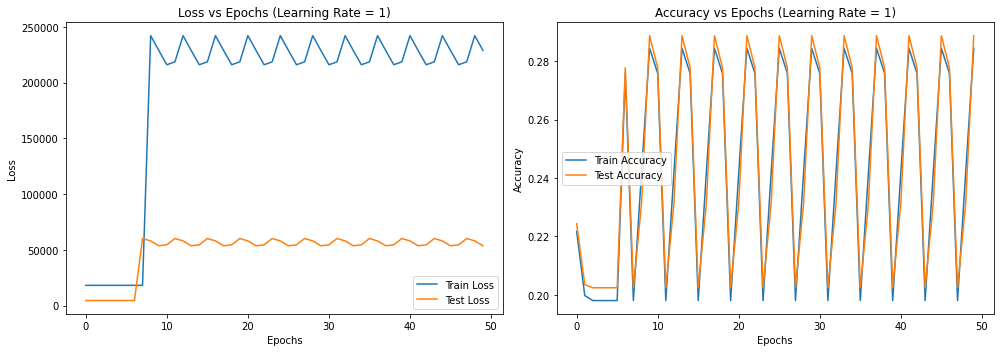


Training with learning rate: 0.1
Epoch 10 | Train Loss: 18169.2021 | Test Loss: 4541.6333 | Train Acc: 0.2015 | Test Acc: 0.2049
Epoch 20 | Train Loss: 18170.5993 | Test Loss: 4542.0461 | Train Acc: 0.1980 | Test Acc: 0.2024
Epoch 30 | Train Loss: 18175.8529 | Test Loss: 4543.5810 | Train Acc: 0.1980 | Test Acc: 0.2024
Epoch 40 | Train Loss: 18177.5500 | Test Loss: 4541.2119 | Train Acc: 0.2759 | Test Acc: 0.2780
Epoch 50 | Train Loss: 228830.5607 | Test Loss: 60166.5485 | Train Acc: 0.1980 | Test Acc: 0.2024


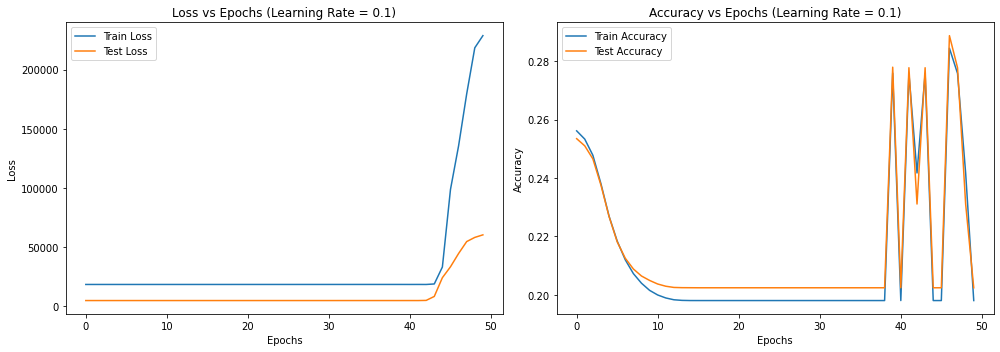


Training with learning rate: 0.001
Epoch 10 | Train Loss: 18168.7683 | Test Loss: 4541.5008 | Train Acc: 0.2573 | Test Acc: 0.2552
Epoch 20 | Train Loss: 18168.7692 | Test Loss: 4541.5011 | Train Acc: 0.2572 | Test Acc: 0.2548
Epoch 30 | Train Loss: 18168.7704 | Test Loss: 4541.5014 | Train Acc: 0.2571 | Test Acc: 0.2546
Epoch 40 | Train Loss: 18168.7717 | Test Loss: 4541.5018 | Train Acc: 0.2569 | Test Acc: 0.2544
Epoch 50 | Train Loss: 18168.7732 | Test Loss: 4541.5022 | Train Acc: 0.2568 | Test Acc: 0.2543


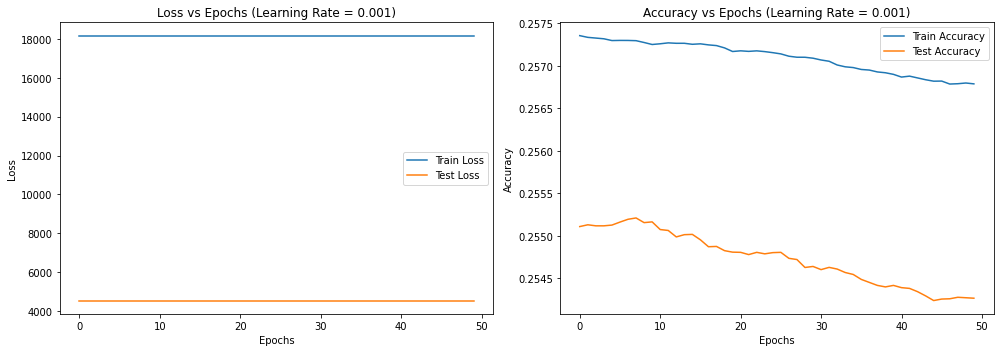

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU activation function
def relu_derivative(x):
    return (x > 0).astype(float)

# Softmax function with numerical stability
def softmax(x):
    shift_x = x - np.max(x, axis=1, keepdims=True)  # Subtract max for stability
    exp_x = np.exp(shift_x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Cross-entropy loss function with stability (prevents log(0))
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    y_pred = np.clip(y_pred, 1e-10, 1.0)  # Clip values to avoid log(0)
    correct_confidences = y_pred[range(n_samples), y_true]
    loss = -np.sum(np.log(correct_confidences)) / n_samples
    return loss

# Function to compute accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Backpropagation and weight update with gradient clipping
def backprop(X, y, W1, b1, W2, b2, W3, b3, learning_rate, clip_value=5.0):
    # Forward propagation
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)  # ReLU activation

    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)  # ReLU activation

    z3 = np.dot(a2, W3) + b3
    output = softmax(z3)  # Softmax activation

    # Calculate loss
    loss = cross_entropy_loss(y, output)

    # Backward propagation
    m = y.shape[0]
    output[range(m), y] -= 1
    output /= m

    dW3 = np.dot(a2.T, output)
    db3 = np.sum(output, axis=0, keepdims=True)

    da2 = np.dot(output, W3.T)
    dz2 = da2 * relu_derivative(z2)  # ReLU derivative

    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)  # ReLU derivative

    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Gradient clipping to avoid exploding gradients
    dW1 = np.clip(dW1, -clip_value, clip_value)
    dW2 = np.clip(dW2, -clip_value, clip_value)
    dW3 = np.clip(dW3, -clip_value, clip_value)
    db1 = np.clip(db1, -clip_value, clip_value)
    db2 = np.clip(db2, -clip_value, clip_value)
    db3 = np.clip(db3, -clip_value, clip_value)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1, b1, W2, b2, W3, b3, loss

# Train the neural network
def train_neural_network(X_train, y_train, X_test, y_test, learning_rate, epochs):
    input_size = X_train.shape[1]
    hidden_size1 = 100
    hidden_size2 = 40
    output_size = 4  # Number of classes

    # Initialize weights and biases with small random values
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size1) * 0.01
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) * 0.01
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size) * 0.01
    b3 = np.zeros((1, output_size))

    train_costs = []
    test_costs = []
    train_accs = []
    test_accs = []

    for epoch in range(epochs):
        # Backpropagation and weight updates
        W1, b1, W2, b2, W3, b3, train_loss = backprop(X_train, y_train, W1, b1, W2, b2, W3, b3, learning_rate)

        # Forward pass for training accuracy
        z1 = np.dot(X_train, W1) + b1
        a1 = relu(z1)  # ReLU activation
        z2 = np.dot(a1, W2) + b2
        a2 = relu(z2)  # ReLU activation
        z3 = np.dot(a2, W3) + b3
        train_output = softmax(z3)
        y_train_pred = np.argmax(train_output, axis=1)
        train_acc = accuracy(y_train, y_train_pred)

        # Forward pass for test accuracy
        z1_test = np.dot(X_test, W1) + b1
        a1_test = relu(z1_test)  # ReLU activation
        z2_test = np.dot(a1_test, W2) + b2
        a2_test = relu(z2_test)  # ReLU activation
        z3_test = np.dot(a2_test, W3) + b3
        test_output = softmax(z3_test)
        y_test_pred = np.argmax(test_output, axis=1)
        test_acc = accuracy(y_test, y_test_pred)

        # Calculate test loss
        test_loss = cross_entropy_loss(y_test, test_output)

        # Store loss and accuracy values
        train_costs.append(train_loss)
        test_costs.append(test_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

    return train_costs, test_costs, train_accs, test_accs

# Plot training results
def plot_metrics(train_costs, test_costs, train_accs, test_accs, learning_rate):
    epochs = len(train_costs)
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), train_costs, label='Train Loss')
    plt.plot(range(epochs), test_costs, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss vs Epochs (Learning Rate = {learning_rate})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), train_accs, label='Train Accuracy')
    plt.plot(range(epochs), test_accs, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Epochs (Learning Rate = {learning_rate})')
    plt.legend()

    plt.tight_layout()
    plt.show()



X_train = pd.read_csv(r"Task_2\x_train.csv").values  # features
y_train = pd.read_csv(r"Task_2\y_train.csv").values  # labels

X_test = pd.read_csv(r"Task_2\x_test.csv").values
y_test = pd.read_csv(r"Task_2\y_test.csv").values


learning_rates = [1, 0.1, 0.001]
epochs = 50

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    train_costs, test_costs, train_accs, test_accs = train_neural_network(X_train, y_train, X_test, y_test, lr, epochs)
    plot_metrics(train_costs, test_costs, train_accs, test_accs, lr)



Training with learning rate: 1
Epoch 10 | Train Loss: 228830.9065 | Test Loss: 53650.2327 | Train Acc: 0.2844 | Test Acc: 0.2888
Epoch 20 | Train Loss: 218538.3512 | Test Loss: 60166.5485 | Train Acc: 0.1980 | Test Acc: 0.2024
Epoch 30 | Train Loss: 228830.9065 | Test Loss: 53650.2327 | Train Acc: 0.2844 | Test Acc: 0.2888
Epoch 40 | Train Loss: 218538.3512 | Test Loss: 60166.5485 | Train Acc: 0.1980 | Test Acc: 0.2024
Epoch 50 | Train Loss: 228830.9065 | Test Loss: 53650.2327 | Train Acc: 0.2844 | Test Acc: 0.2888


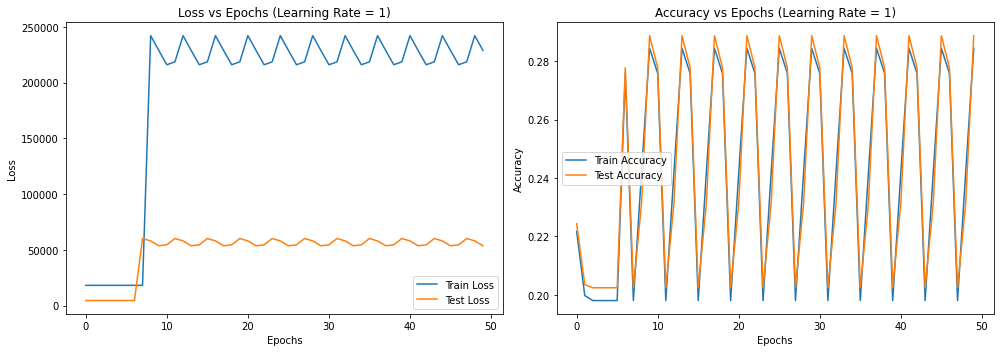


Training with learning rate: 0.1
Epoch 10 | Train Loss: 18169.2021 | Test Loss: 4541.6333 | Train Acc: 0.2015 | Test Acc: 0.2049
Epoch 20 | Train Loss: 18170.5993 | Test Loss: 4542.0461 | Train Acc: 0.1980 | Test Acc: 0.2024
Epoch 30 | Train Loss: 18175.8529 | Test Loss: 4543.5810 | Train Acc: 0.1980 | Test Acc: 0.2024
Epoch 40 | Train Loss: 18177.5500 | Test Loss: 4541.2119 | Train Acc: 0.2759 | Test Acc: 0.2780
Epoch 50 | Train Loss: 228830.5607 | Test Loss: 60166.5485 | Train Acc: 0.1980 | Test Acc: 0.2024


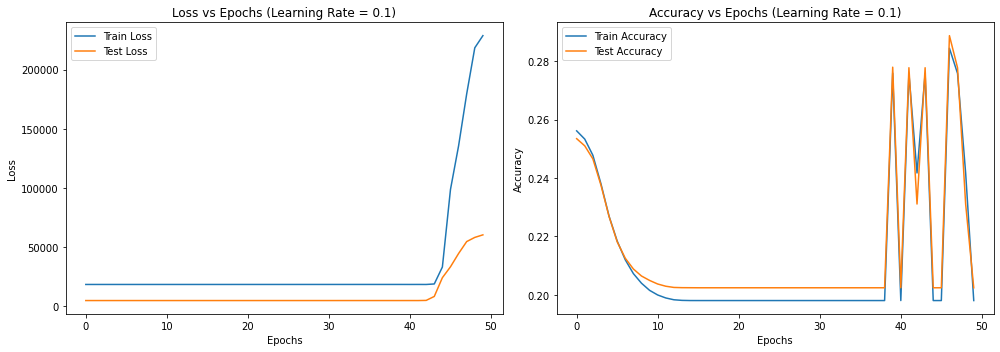


Training with learning rate: 0.001
Epoch 10 | Train Loss: 18168.7683 | Test Loss: 4541.5008 | Train Acc: 0.2573 | Test Acc: 0.2552
Epoch 20 | Train Loss: 18168.7692 | Test Loss: 4541.5011 | Train Acc: 0.2572 | Test Acc: 0.2548
Epoch 30 | Train Loss: 18168.7704 | Test Loss: 4541.5014 | Train Acc: 0.2571 | Test Acc: 0.2546
Epoch 40 | Train Loss: 18168.7717 | Test Loss: 4541.5018 | Train Acc: 0.2569 | Test Acc: 0.2544
Epoch 50 | Train Loss: 18168.7732 | Test Loss: 4541.5022 | Train Acc: 0.2568 | Test Acc: 0.2543


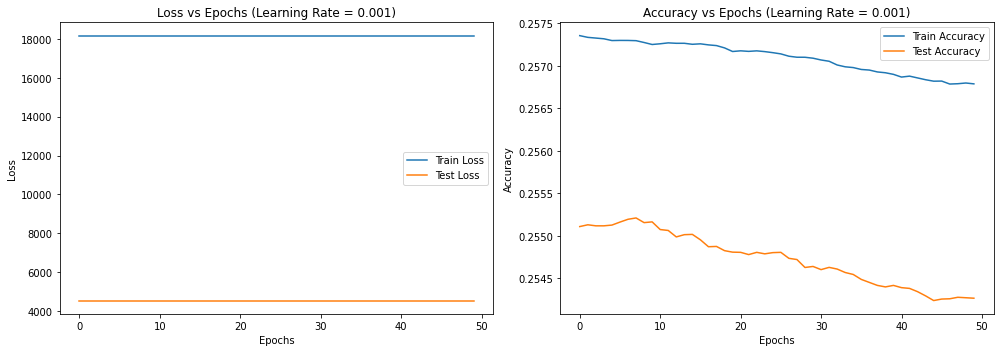

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU activation function
def relu_derivative(x):
    return (x > 0).astype(float)

# Softmax function with numerical stability
def softmax(x):
    shift_x = x - np.max(x, axis=1, keepdims=True)  # Subtract max for stability
    exp_x = np.exp(shift_x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Cross-entropy loss function with stability (prevents log(0))
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    y_pred = np.clip(y_pred, a_min=1e-10, a_max=None)  # Clip values to avoid log(0)
    correct_confidences = y_pred[range(n_samples), y_true]
    loss = -np.sum(np.log(correct_confidences)) / n_samples
    return loss

# Function to compute accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Backpropagation and weight update with gradient clipping
def backprop(X, y, W1, b1, W2, b2, W3, b3, learning_rate, clip_value=5.0):
    # Forward propagation
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)  # ReLU activation

    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)  # ReLU activation

    z3 = np.dot(a2, W3) + b3
    output = softmax(z3)  # Softmax activation

    # Calculate loss
    loss = cross_entropy_loss(y, output)

    # Backward propagation
    m = y.shape[0]
    output[range(m), y] -= 1
    output /= m

    dW3 = np.dot(a2.T, output)
    db3 = np.sum(output, axis=0, keepdims=True)

    da2 = np.dot(output, W3.T)
    dz2 = da2 * relu_derivative(z2)  # ReLU derivative

    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)  # ReLU derivative

    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Gradient clipping to avoid exploding gradients
    dW1 = np.clip(dW1, -clip_value, clip_value)
    dW2 = np.clip(dW2, -clip_value, clip_value)
    dW3 = np.clip(dW3, -clip_value, clip_value)
    db1 = np.clip(db1, -clip_value, clip_value)
    db2 = np.clip(db2, -clip_value, clip_value)
    db3 = np.clip(db3, -clip_value, clip_value)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1, b1, W2, b2, W3, b3, loss

# Train the neural network
def train_neural_network(X_train, y_train, X_test, y_test, learning_rate, epochs):
    input_size = X_train.shape[1]
    hidden_size1 = 100
    hidden_size2 = 40
    output_size = 4  # Number of classes

    # Initialize weights and biases with small random values
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size1) * 0.01
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) * 0.01
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size) * 0.01
    b3 = np.zeros((1, output_size))

    train_costs = []
    test_costs = []
    train_accs = []
    test_accs = []

    for epoch in range(epochs):
        # Backpropagation and weight updates
        W1, b1, W2, b2, W3, b3, train_loss = backprop(X_train, y_train, W1, b1, W2, b2, W3, b3, learning_rate)

        # Forward pass for training accuracy
        z1 = np.dot(X_train, W1) + b1
        a1 = relu(z1)  # ReLU activation
        z2 = np.dot(a1, W2) + b2
        a2 = relu(z2)  # ReLU activation
        z3 = np.dot(a2, W3) + b3
        train_output = softmax(z3)
        y_train_pred = np.argmax(train_output, axis=1)
        train_acc = accuracy(y_train, y_train_pred)

        # Forward pass for test accuracy
        z1_test = np.dot(X_test, W1) + b1
        a1_test = relu(z1_test)  # ReLU activation
        z2_test = np.dot(a1_test, W2) + b2
        a2_test = relu(z2_test)  # ReLU activation
        z3_test = np.dot(a2_test, W3) + b3
        test_output = softmax(z3_test)
        y_test_pred = np.argmax(test_output, axis=1)
        test_acc = accuracy(y_test, y_test_pred)

        # Calculate test loss
        test_loss = cross_entropy_loss(y_test, test_output)

        # Store loss and accuracy values
        train_costs.append(train_loss)
        test_costs.append(test_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

    return train_costs, test_costs, train_accs, test_accs

# Plot training results
def plot_metrics(train_costs, test_costs, train_accs, test_accs, learning_rate):
    epochs = len(train_costs)
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), train_costs, label='Train Loss')
    plt.plot(range(epochs), test_costs, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss vs Epochs (Learning Rate = {learning_rate})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), train_accs, label='Train Accuracy')
    plt.plot(range(epochs), test_accs, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Epochs (Learning Rate = {learning_rate})')
    plt.legend()

    plt.tight_layout()
    plt.show()



X_train = pd.read_csv(r"Task_2\x_train.csv").values  # features
y_train = pd.read_csv(r"Task_2\y_train.csv").values  # labels

X_test = pd.read_csv(r"Task_2\x_test.csv").values
y_test = pd.read_csv(r"Task_2\y_test.csv").values


learning_rates = [1, 0.1, 0.001]
epochs = 50

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    train_costs, test_costs, train_accs, test_accs = train_neural_network(X_train, y_train, X_test, y_test, lr, epochs)
    plot_metrics(train_costs, test_costs, train_accs, test_accs, lr)
